In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
from keras.layers import Dense, Flatten, Conv2D, Dropout

In [5]:
from keras.utils import to_categorical

In [6]:
from keras import Sequential

In [7]:
letters = pd.read_csv('/content/mnist2.csv')

In [8]:
letters.head(3)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
letters.shape

(1928, 785)

In [10]:
X= letters.drop('5', axis=1).values

In [11]:
X= X.reshape(1928,28,28)

In [12]:
letters['5'].value_counts()

1    227
3    207
9    196
6    192
2    191
7    191
4    185
8    184
0    181
5    174
Name: 5, dtype: int64

In [13]:
letters['5'] = pd.Categorical(letters['5'])

In [14]:
letters['5'] = letters['5'].cat.codes

In [15]:
y= to_categorical(letters['5'])

In [16]:
y[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

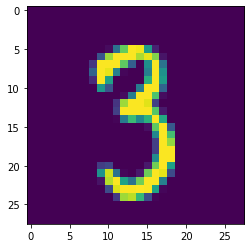

In [17]:
plt.imshow(X[1])

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
stopper= EarlyStopping(patience=4, monitor='val_loss')

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [22]:
model= Sequential()

In [23]:
 model.add(Conv2D(5, activation='relu', kernel_size=(4), input_shape=(28,28,1), strides=2, padding='same'))

In [24]:
model.add(Conv2D(5, kernel_size=(3),activation='relu', padding='same', dilation_rate=2))

In [25]:
model.add(Flatten())

In [26]:
model.add(Dense(10, activation='softmax'))

In [27]:
model.compile('adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [28]:
model.fit(X_train, y_train, epochs=20,  validation_split=0.15)

Epoch 1/20
44/44 [==============================] - 2s 27ms/step - loss: nan - accuracy: 0.2047 - val_loss: nan - val_accuracy: 0.0935
Epoch 2/20
44/44 [==============================] - 1s 17ms/step - loss: nan - accuracy: 0.0934 - val_loss: nan - val_accuracy: 0.0935
Epoch 3/20
44/44 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.0934 - val_loss: nan - val_accuracy: 0.0935
Epoch 4/20
44/44 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.0934 - val_loss: nan - val_accuracy: 0.0935
Epoch 5/20
44/44 [==============================] - 1s 11ms/step - loss: nan - accuracy: 0.0934 - val_loss: nan - val_accuracy: 0.0935
Epoch 6/20
44/44 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.0934 - val_loss: nan - val_accuracy: 0.0935
Epoch 7/20
44/44 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.0934 - val_loss: nan - val_accuracy: 0.0935
Epoch 8/20
44/44 [==============================] - 0s 

In [29]:
zeichen= pd.read_csv('/content/slmnist.csv')

In [30]:
zeichen.head(3)

,1,142,143,146,148,149,149.1,149.2,150,151,...,0.1,15,55,63,37.2,61.1,77.2,65.1,38.1,23
0,0,141,142,144,145,147,149,150,151,152,...,173,179,179,180,181,181,182,182,183,183
1,1,156,157,160,162,164,166,169,171,171,...,181,197,195,193,193,191,192,198,193,182
2,3,63,26,65,86,97,106,117,123,128,...,175,179,180,182,183,183,184,185,185,185


In [31]:
model2= Sequential()

In [32]:
model2.add(Conv2D(10, kernel_size=(3), input_shape=(28,28,1), activation='relu'))

In [33]:
model2.add(Conv2D(10, kernel_size=(4), activation='relu'))

In [34]:
model2.add(Conv2D(10, kernel_size=(4), activation='relu'))

In [35]:
model2.add(Flatten())

In [36]:
model2.add(Dense(10, activation='softmax'))

In [37]:
model2.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model2.fit(X_train,y_train, epochs=20, batch_size=500, validation_split=0.15)

Epoch 1/20
3/3 [==============================] - 3s 608ms/step - loss: nan - accuracy: 0.0869 - val_loss: nan - val_accuracy: 0.0935
Epoch 2/20
3/3 [==============================] - 2s 535ms/step - loss: nan - accuracy: 0.0934 - val_loss: nan - val_accuracy: 0.0935
Epoch 3/20
3/3 [==============================] - 2s 572ms/step - loss: nan - accuracy: 0.0934 - val_loss: nan - val_accuracy: 0.0935
Epoch 4/20
3/3 [==============================] - 2s 558ms/step - loss: nan - accuracy: 0.0934 - val_loss: nan - val_accuracy: 0.0935
Epoch 5/20
3/3 [==============================] - 2s 572ms/step - loss: nan - accuracy: 0.0934 - val_loss: nan - val_accuracy: 0.0935
Epoch 6/20
3/3 [==============================] - 3s 922ms/step - loss: nan - accuracy: 0.0934 - val_loss: nan - val_accuracy: 0.0935
Epoch 7/20
3/3 [==============================] - 2s 522ms/step - loss: nan - accuracy: 0.0934 - val_loss: nan - val_accuracy: 0.0935
Epoch 8/20
3/3 [==============================] - 2s 543ms/ste

In [39]:
zeichen['1'] = pd.Categorical(zeichen['1'])

In [40]:
zeichen['1'] = zeichen['1'].cat.codes

In [41]:
y = to_categorical(zeichen['1'])

In [42]:
X= zeichen.drop('1', axis=1).values

In [43]:
X.shape

(1999, 784)

In [44]:
X= X.reshape(1999, 28,28)

In [45]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [46]:
model3= Sequential()

In [47]:
model3.add(Conv2D(10, kernel_size=(3), input_shape=(28,28,1), strides=2, activation='relu'))

In [48]:
model3.add(Conv2D(10, kernel_size=(5), activation='relu', dilation_rate=2))

In [49]:
model3.add(Conv2D(6, kernel_size=(3), activation='relu', padding='same'))

In [50]:
model3.add(Flatten())

In [51]:
model3.add(Dense(4, activation='softmax'))

In [52]:
model3.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
model3.fit(X_train,y_train, epochs=15, batch_size=500, validation_split=0.2, callbacks=[stopper])

Epoch 1/15
3/3 [==============================] - 4s 411ms/step - loss: 71.4471 - accuracy: 0.2424 - val_loss: 17.9811 - val_accuracy: 0.2906
Epoch 2/15
3/3 [==============================] - 0s 168ms/step - loss: 19.5195 - accuracy: 0.2267 - val_loss: 12.1439 - val_accuracy: 0.2500
Epoch 3/15
3/3 [==============================] - 1s 177ms/step - loss: 9.2803 - accuracy: 0.2658 - val_loss: 11.2561 - val_accuracy: 0.3094
Epoch 4/15
3/3 [==============================] - 1s 274ms/step - loss: 11.6039 - accuracy: 0.3440 - val_loss: 8.1571 - val_accuracy: 0.3531
Epoch 5/15
3/3 [==============================] - 1s 275ms/step - loss: 7.3916 - accuracy: 0.3260 - val_loss: 7.6031 - val_accuracy: 0.2812
Epoch 6/15
3/3 [==============================] - 1s 237ms/step - loss: 7.3391 - accuracy: 0.3073 - val_loss: 5.1500 - val_accuracy: 0.3688
Epoch 7/15
3/3 [==============================] - 1s 246ms/step - loss: 5.2297 - accuracy: 0.3487 - val_loss: 5.2492 - val_accuracy: 0.3688
Epoch 8/15
3/3

In [78]:
sample =X_train[1]

In [79]:
pool = np.zeros((14,14))

In [80]:
pool.shape

(14, 14)

In [81]:
for r in range(sample.shape[0]//2):
  for c in range(sample.shape[1]//2):
    pool[r, c] = np.max(sample[r*2:r*2+2, c*2:c*2+2])

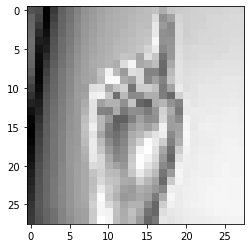

In [77]:
plt.imshow(sample, cmap='gray')

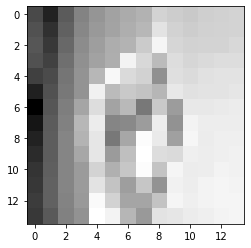

In [82]:
plt.imshow(pool, cmap='gray')

In [83]:
from tensorflow.keras.layers import MaxPool2D

In [102]:
model4 = Sequential()

In [103]:
model4.add(Conv2D(15, kernel_size=(4), padding='same', activation='relu', input_shape=(28,28,1)))

In [104]:
model4.add(MaxPool2D(2))

In [105]:
model4.add(Conv2D(10, kernel_size=(3), activation='relu', padding='same'))

In [106]:
model4.add(MaxPool2D(2))

In [107]:
model4.add(Conv2D(kernel_size=(3), activation='relu', strides=2))

TypeError: ignored

In [108]:
model4.add(Flatten())

In [109]:
model4.add(Dense(4, activation='softmax'))

In [110]:
model4.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [111]:
model4.fit(X_train, y_train, validation_split=0.2, epochs=15, callbacks=[stopper], batch_size=500)

Epoch 1/15
3/3 [==============================] - 2s 378ms/step - loss: 31.9389 - accuracy: 0.1822 - val_loss: 17.6179 - val_accuracy: 0.2250
Epoch 2/15
3/3 [==============================] - 1s 264ms/step - loss: 15.2333 - accuracy: 0.2158 - val_loss: 8.3390 - val_accuracy: 0.2906
Epoch 3/15
3/3 [==============================] - 1s 262ms/step - loss: 7.2595 - accuracy: 0.2697 - val_loss: 6.4611 - val_accuracy: 0.2656
Epoch 4/15
3/3 [==============================] - 1s 255ms/step - loss: 6.3007 - accuracy: 0.3198 - val_loss: 4.1536 - val_accuracy: 0.3281
Epoch 5/15
3/3 [==============================] - 1s 480ms/step - loss: 4.0607 - accuracy: 0.3784 - val_loss: 3.3581 - val_accuracy: 0.4906
Epoch 6/15
3/3 [==============================] - 1s 486ms/step - loss: 3.3537 - accuracy: 0.4519 - val_loss: 2.3890 - val_accuracy: 0.5125
Epoch 7/15
3/3 [==============================] - 1s 251ms/step - loss: 2.4818 - accuracy: 0.4949 - val_loss: 2.2550 - val_accuracy: 0.5156
Epoch 8/15
3/3 [=

In [112]:
from keras.callbacks import ModelCheckpoint

In [113]:
checkpoint= ModelCheckpoint('model6.hdf5', monitor='val_loss', save_best_only=True)

In [127]:
model6 = Sequential()

In [128]:
model6.add(Conv2D(10, kernel_size=(3), input_shape=(28,28,1), padding='same'))

In [129]:
model6.add(Conv2D(10, kernel_size=(3), activation='relu'))

In [130]:
model6.add(Conv2D(8, kernel_size=(3), activation='relu'))

In [131]:
model6.add(Flatten())

In [132]:
model6.add(Dense(4,activation='softmax'))

In [133]:
model6.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [134]:
model6.fit(X_train,y_train, validation_split=0.2, callbacks=[checkpoint], epochs=15, batch_size=500)

Epoch 1/15
3/3 [==============================] - 3s 548ms/step - loss: 81.0620 - accuracy: 0.2502 - val_loss: 142.2253 - val_accuracy: 0.2812
Epoch 2/15
3/3 [==============================] - 1s 439ms/step - loss: 118.7083 - accuracy: 0.2416 - val_loss: 31.7823 - val_accuracy: 0.3187
Epoch 3/15
3/3 [==============================] - 2s 731ms/step - loss: 21.7182 - accuracy: 0.3057 - val_loss: 4.6505 - val_accuracy: 0.2812
Epoch 4/15
3/3 [==============================] - 2s 553ms/step - loss: 3.9693 - accuracy: 0.3088 - val_loss: 2.1497 - val_accuracy: 0.3406
Epoch 5/15
3/3 [==============================] - 1s 442ms/step - loss: 1.8140 - accuracy: 0.3909 - val_loss: 1.2171 - val_accuracy: 0.4844
Epoch 6/15
3/3 [==============================] - 1s 448ms/step - loss: 1.1702 - accuracy: 0.4840 - val_loss: 1.0395 - val_accuracy: 0.5312
Epoch 7/15
3/3 [==============================] - 1s 457ms/step - loss: 1.0504 - accuracy: 0.5035 - val_loss: 1.0043 - val_accuracy: 0.5031
Epoch 8/15
3/

In [137]:
model7 =Sequential()

In [138]:
model7.add(Conv2D(10, kernel_size=(3), input_shape=(28,28,1), padding='same'))

In [139]:
model7.add(Conv2D(10, kernel_size=(3), activation='relu'))

In [140]:
model7.add(Conv2D(8, kernel_size=(3), activation='relu'))

In [141]:
model7.add(Flatten())

In [142]:
model7.add(Dense(4,activation='softmax'))

In [143]:
model7.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [144]:
model7.load_weights('model6.hdf5')

In [146]:
model7.evaluate(X_test, y_test)

13/13 [==============================] - 1s 29ms/step - loss: 0.0392 - accuracy: 0.9875


[0.03924696892499924, 0.987500011920929]